## SAFE Demo

This shows how the safe model can be implemented, as described [here](https://cds.ismrm.org/ismrm-2000/PDF7/2007.PDF) 

In [11]:
from safe_demo.safe_params import get_random_safe_params
from safe_demo.filtering import tau_filter

import numpy as np
import matplotlib.pyplot as plt

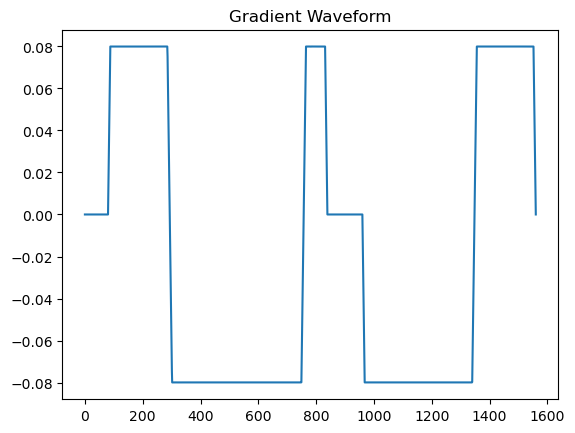

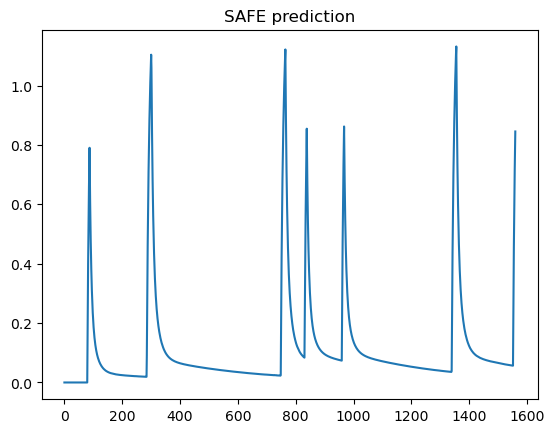

In [16]:
axis = 0

safe_params, safe_params_cardiac = get_random_safe_params(42)

npz = np.load('waveforms/diff_pns.npz')
g = npz['g']
dt = npz['dt']

dgdt = np.diff(g)/dt

stim1 = safe_params['a1'][axis] * np.abs(tau_filter(dgdt, safe_params['tau1'][axis], dt))
stim2 = safe_params['a2'][axis] * tau_filter(np.abs(dgdt), safe_params['tau2'][axis], dt)
stim3 = safe_params['a3'][axis] * np.abs(tau_filter(dgdt, safe_params['tau3'][axis], dt))

stim = safe_params['g_scale'][axis] / safe_params['stim_limit'][axis] * (stim1 + stim2 + stim3)


plt.figure()
plt.plot(g)
plt.title('Gradient Waveform')
plt.show()

plt.figure()
plt.plot(stim)
plt.title('SAFE prediction')
plt.show()